In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data_df = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498650 entries, 0 to 5498649
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 797.1+ MB


In [5]:
data_df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [6]:
data_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


### Data Cleaning

In [9]:
# shape of the data
data_df.shape

(5498650, 19)

In [10]:
# data types of all columns 
data_df.dtypes

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lon_Lat               object
dtype: object

In [11]:
data_df['PERP_RACE'].value_counts()

BLACK                             2673976
WHITE HISPANIC                    1423743
WHITE                              657104
BLACK HISPANIC                     446257
ASIAN / PACIFIC ISLANDER           231544
UNKNOWN                             52275
AMERICAN INDIAN/ALASKAN NATIVE      12388
OTHER                                1363
Name: PERP_RACE, dtype: int64

In [12]:
# identify missing values and count them
data_df.isnull().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  874
PD_DESC               9169
KY_CD                 9739
OFNS_DESC             9169
LAW_CODE               196
LAW_CAT_CD           22001
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

In [13]:
# Remove any features that are not relevant to your research goals
data_df.drop(['ARREST_KEY','PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_PRECINCT','JURISDICTION_CODE'
              ], axis=1, inplace=True)

In [14]:
# identify missing values and count them
data_df.isnull().sum()

ARREST_DATE       0
OFNS_DESC      9169
ARREST_BORO       8
AGE_GROUP        17
PERP_SEX          0
PERP_RACE         0
X_COORD_CD        1
Y_COORD_CD        1
Latitude          1
Longitude         1
Lon_Lat           1
dtype: int64

In [15]:
data_df = data_df.dropna()

# reset index
data_df.reset_index(drop=True, inplace=True)

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489459 entries, 0 to 5489458
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ARREST_DATE  object 
 1   OFNS_DESC    object 
 2   ARREST_BORO  object 
 3   AGE_GROUP    object 
 4   PERP_SEX     object 
 5   PERP_RACE    object 
 6   X_COORD_CD   float64
 7   Y_COORD_CD   float64
 8   Latitude     float64
 9   Longitude    float64
 10  Lon_Lat      object 
dtypes: float64(4), object(7)
memory usage: 460.7+ MB


# Data Preprocessing

In [17]:
unique_age_groups = data_df['AGE_GROUP'].unique()
print(unique_age_groups)

['25-44' '45-64' '18-24' '<18' '65+' '929' '944' '945' '320' '932' '894'
 '935' '934' '940' '339' '323' '965' '948' '946' 'UNKNOWN' '938' '895'
 '194' '928' '352' '943' '956' '920' '951' '708' '816' '316' '912' '237'
 '939' '947' '740' '952' '949' '338' '922' '933' '921' '1042' '2000'
 '1937' '1916' '1928' '2007' '1918' '1947' '1998' '1953' '1942' '1024'
 '1948' '937' '1922' '1048' '1018' '918' '927' '926' '931' '942' '924'
 '941' '930' '955' '936' '808' '812' '317' '909' '923' '914' '231' '896'
 '709' '640' '925' '212' '200' '954' '314' '723' '309' '959' '910' '446'
 '330']


In [18]:
# List of valid age groups
valid_age_groups = ['25-44', '45-64', '18-24', '<18', '65+']

# Filter the dataframe to include only rows with valid age groups
data_df = data_df[data_df['AGE_GROUP'].isin(valid_age_groups)]

In [19]:
data_df['AGE_GROUP'].value_counts()

25-44    2587420
18-24    1406886
45-64    1016672
<18       429433
65+        48870
Name: AGE_GROUP, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ["OFNS_DESC", "ARREST_BORO", "AGE_GROUP", "PERP_SEX", "PERP_RACE"]

for col in categorical_columns:
    data_df[col] = label_encoder.fit_transform(data_df[col])

In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489281 entries, 0 to 5489458
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ARREST_DATE  object 
 1   OFNS_DESC    int32  
 2   ARREST_BORO  int32  
 3   AGE_GROUP    int32  
 4   PERP_SEX     int32  
 5   PERP_RACE    int32  
 6   X_COORD_CD   float64
 7   Y_COORD_CD   float64
 8   Latitude     float64
 9   Longitude    float64
 10  Lon_Lat      object 
dtypes: float64(4), int32(5), object(2)
memory usage: 397.9+ MB


In [22]:
# Convert the ARREST_DATE column to the desired date format
data_df['ARREST_DATE'] = pd.to_datetime(data_df['ARREST_DATE'], format='%m/%d/%Y')

In [23]:
data_df['ARREST_DATE'].value_counts()

2010-01-20    1772
2009-05-13    1769
2012-03-07    1744
2009-02-11    1738
2012-02-01    1722
              ... 
2012-10-29     150
2021-02-01     139
2006-12-25     138
2014-12-25     136
2010-12-27      90
Name: ARREST_DATE, Length: 6209, dtype: int64

In [24]:
# Assuming you already converted 'ARREST_DATE' to datetime as you mentioned
data_df['ARREST_DAY'] = data_df['ARREST_DATE'].dt.day
data_df['ARREST_MONTH'] = data_df['ARREST_DATE'].dt.month
data_df['ARREST_YEAR'] = data_df['ARREST_DATE'].dt.year

# Model Training

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [26]:
data_df.head()

,ARREST_DATE,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,ARREST_DAY,ARREST_MONTH,ARREST_YEAR
0,2021-12-04,79,0,1,1,7,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034),4,12,2021
1,2021-11-09,81,3,1,1,2,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003),9,11,2021
2,2019-01-26,81,2,2,1,2,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045),26,1,2019
3,2021-11-10,7,0,1,1,7,1017934.0,232221.0,40.804013,-73.878332,POINT (-73.87833183299993 40.804012949000025),10,11,2021
4,2021-12-28,29,3,0,1,2,1045482.0,191341.0,40.691660,-73.779199,POINT (-73.77919852099996 40.69166001700007),28,12,2021


In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489281 entries, 0 to 5489458
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   ARREST_DATE   datetime64[ns]
 1   OFNS_DESC     int32         
 2   ARREST_BORO   int32         
 3   AGE_GROUP     int32         
 4   PERP_SEX      int32         
 5   PERP_RACE     int32         
 6   X_COORD_CD    float64       
 7   Y_COORD_CD    float64       
 8   Latitude      float64       
 9   Longitude     float64       
 10  Lon_Lat       object        
 11  ARREST_DAY    int64         
 12  ARREST_MONTH  int64         
 13  ARREST_YEAR   int64         
dtypes: datetime64[ns](1), float64(4), int32(5), int64(3), object(1)
memory usage: 523.5+ MB


In [35]:
# Assuming your data is loaded into a DataFrame named 'data_df'
# X features and Y label
X = ['OFNS_DESC','AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO']  # This is your target variable

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(data_df[X], data_df[Y], test_size=0.2, random_state=42)

# Convert the X_train and X_test DataFrames to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()
Y_train_array = Y_train.to_numpy()
Y_test_array = Y_test.to_numpy()

# Create a neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_array.shape[1]))
model.add(Dense(units=len(np.unique(Y_train_array)), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_array, Y_train_array, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
109786/109786 [==============================] - 237s 2ms/step - loss: 2.1656 - accuracy: 0.2565 - val_loss: 1.5555 - val_accuracy: 0.2768
Epoch 2/10
109786/109786 [==============================] - 232s 2ms/step - loss: 1.5071 - accuracy: 0.2904 - val_loss: 1.4759 - val_accuracy: 0.2992
Epoch 3/10
109786/109786 [==============================] - 243s 2ms/step - loss: 1.4764 - accuracy: 0.2937 - val_loss: 1.4750 - val_accuracy: 0.2993
Epoch 4/10
109786/109786 [==============================] - 231s 2ms/step - loss: 1.4764 - accuracy: 0.2935 - val_loss: 1.4768 - val_accuracy: 0.2957
Epoch 5/10
109786/109786 [==============================] - 240s 2ms/step - loss: 1.4764 - accuracy: 0.2937 - val_loss: 1.4788 - val_accuracy: 0.2736
Epoch 6/10
109786/109786 [==============================] - 231s 2ms/step - loss: 1.4764 - accuracy: 0.2935 - val_loss: 1.4789 - val_accuracy: 0.2868
Epoch 7/10
109786/109786 [==============================] - 239s 2ms/step - loss: 1.4764 - accuracy:

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [38]:
# Train the model
history = model.fit(X_train_array, Y_train_array, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
109786/109786 [==============================] - 137s 1ms/step - loss: 3.1980 - accuracy: 0.2499 - val_loss: 2.4113 - val_accuracy: 0.2293
Epoch 2/10
109786/109786 [==============================] - 210s 2ms/step - loss: 1.6536 - accuracy: 0.2717 - val_loss: 1.4808 - val_accuracy: 0.2767
Epoch 3/10
109786/109786 [==============================] - 221s 2ms/step - loss: 1.4810 - accuracy: 0.2775 - val_loss: 1.4810 - val_accuracy: 0.2767
Epoch 4/10
109786/109786 [==============================] - 214s 2ms/step - loss: 1.4810 - accuracy: 0.2774 - val_loss: 1.4809 - val_accuracy: 0.2767
Epoch 5/10
109786/109786 [==============================] - 219s 2ms/step - loss: 1.4810 - accuracy: 0.2774 - val_loss: 1.4808 - val_accuracy: 0.2767
Epoch 6/10
109786/109786 [==============================] - 216s 2ms/step - loss: 1.4810 - accuracy: 0.2774 - val_loss: 1.4808 - val_accuracy: 0.2767
Epoch 7/10
109786/109786 [==============================] - 213s 2ms/step - loss: 1.4810 - accuracy:

34309/34309 [==============================] - 49s 1ms/step - loss: 1.4809 - accuracy: 0.2768
Test loss: 1.4809, Test accuracy: 0.2768
34309/34309 [==============================] - 44s 1ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    251724
           1       0.28      1.00      0.43    303864
           2       0.00      0.00      0.00    294666
           3       0.00      0.00      0.00    208300
           4       0.00      0.00      0.00     39303

    accuracy                           0.28   1097857
   macro avg       0.06      0.20      0.09   1097857
weighted avg       0.08      0.28      0.12   1097857



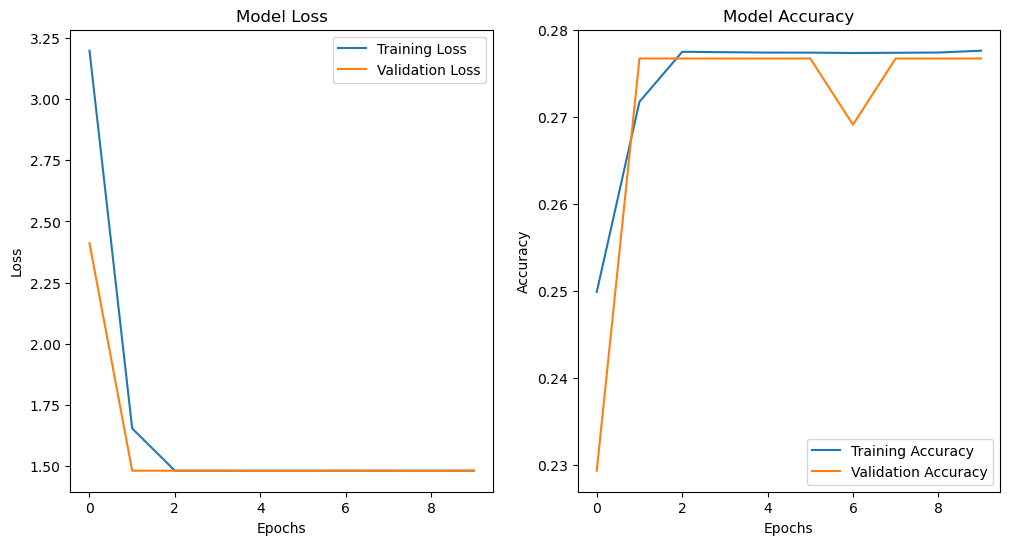

In [39]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_array, Y_test_array)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

# Generate a classification report
Y_pred = model.predict(X_test_array)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_report = classification_report(Y_test_array, Y_pred_classes)
print("Classification Report:\n", class_report)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming your data is loaded into a DataFrame named 'data_df'
# X features and Y label
X = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO']  # This is your target variable

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(data_df[X], data_df[Y], test_size=0.2, random_state=42)

# Convert categorical labels to one-hot encoded vectors
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, 5)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, 5)

# Feature Scaling/Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection: Creating a Classification Model
model = keras.Sequential([
    layers.Input(shape=(len(X),)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')  # Multi-class classification
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train_scaled, Y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=2)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
27447/27447 - 47s - loss: 1.4248 - accuracy: 0.3506 - val_loss: 1.4146 - val_accuracy: 0.3577 - 47s/epoch - 2ms/step
Epoch 2/10
27447/27447 - 50s - loss: 1.4121 - accuracy: 0.3596 - val_loss: 1.4083 - val_accuracy: 0.3611 - 50s/epoch - 2ms/step
Epoch 3/10
27447/27447 - 49s - loss: 1.4088 - accuracy: 0.3619 - val_loss: 1.4071 - val_accuracy: 0.3620 - 49s/epoch - 2ms/step
Epoch 4/10
27447/27447 - 49s - loss: 1.4069 - accuracy: 0.3636 - val_loss: 1.4044 - val_accuracy: 0.3642 - 49s/epoch - 2ms/step
Epoch 5/10
27447/27447 - 48s - loss: 1.4057 - accuracy: 0.3647 - val_loss: 1.4057 - val_accuracy: 0.3652 - 48s/epoch - 2ms/step
Epoch 6/10
27447/27447 - 49s - loss: 1.4047 - accuracy: 0.3658 - val_loss: 1.4028 - val_accuracy: 0.3674 - 49s/epoch - 2ms/step
Epoch 7/10
27447/27447 - 49s - loss: 1.4039 - accuracy: 0.3664 - val_loss: 1.4081 - val_accuracy: 0.3614 - 49s/epoch - 2ms/step
Epoch 8/10
27447/27447 - 49s - loss: 1.4031 - accuracy: 0.3674 - val_loss: 1.4014 - val_accuracy: 0.3684

In [40]:
from sklearn.metrics import log_loss

# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)

# Calculate log loss
logloss = log_loss(Y_test_encoded, y_pred_proba)
print("Log Loss:", logloss)

34309/34309 [==============================] - 42s 1ms/step
Log Loss: 1.7605892383202837


In [41]:
from sklearn.metrics import mean_squared_error

# Convert one-hot encoded vectors back to class labels
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = np.argmax(Y_test_encoded, axis=1)

# Calculate MSE
mse = mean_squared_error(y_test_labels, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.4157617977569026


In [42]:
import math

# Calculate RMSE
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1.5542721118764573


In [43]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

# Generate a classification report
class_report = classification_report(Y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])

# Print the classification report
print("Classification Report:\n", class_report)

34309/34309 [==============================] - 43s 1ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.24      0.40      0.30    251724
     Class 1       0.32      0.66      0.43    303864
     Class 2       0.31      0.02      0.03    294666
     Class 3       0.53      0.08      0.13    208300
     Class 4       0.00      0.00      0.00     39303

    accuracy                           0.29   1097857
   macro avg       0.28      0.23      0.18   1097857
weighted avg       0.33      0.29      0.22   1097857



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming your data is loaded into a DataFrame named 'data_df'
# X features and Y label
X = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO']  # This is your target variable

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(data_df[X], data_df[Y], test_size=0.2, random_state=42)

# Convert categorical labels to one-hot encoded vectors
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, 5)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, 5)

# Feature Scaling/Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Input(shape=(len(X),)),
    layers.Dense(128, activation='relu'),  # Increase the number of units in the first hidden layer
    layers.Dropout(0.3),  # Add dropout to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Adjust the learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, Y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=2)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
27447/27447 - 76s - loss: 1.4566 - accuracy: 0.3231 - val_loss: 1.4320 - val_accuracy: 0.3528 - 76s/epoch - 3ms/step
Epoch 2/20
27447/27447 - 72s - loss: 1.4283 - accuracy: 0.3510 - val_loss: 1.4163 - val_accuracy: 0.3573 - 72s/epoch - 3ms/step
Epoch 3/20
27447/27447 - 75s - loss: 1.4195 - accuracy: 0.3555 - val_loss: 1.4130 - val_accuracy: 0.3579 - 75s/epoch - 3ms/step
Epoch 4/20
27447/27447 - 79s - loss: 1.4163 - accuracy: 0.3569 - val_loss: 1.4109 - val_accuracy: 0.3596 - 79s/epoch - 3ms/step
Epoch 5/20
27447/27447 - 78s - loss: 1.4141 - accuracy: 0.3583 - val_loss: 1.4099 - val_accuracy: 0.3604 - 78s/epoch - 3ms/step
Epoch 6/20
27447/27447 - 78s - loss: 1.4123 - accuracy: 0.3599 - val_loss: 1.4076 - val_accuracy: 0.3623 - 78s/epoch - 3ms/step
Epoch 7/20
27447/27447 - 89s - loss: 1.4109 - accuracy: 0.3607 - val_loss: 1.4068 - val_accuracy: 0.3632 - 89s/epoch - 3ms/step
Epoch 8/20
27447/27447 - 81s - loss: 1.4099 - accuracy: 0.3612 - val_loss: 1.4057 - val_accuracy: 0.3637

34309/34309 [==============================] - 52s 2ms/step - loss: 1.7606 - accuracy: 0.2942
Test Loss: 1.7605869770050049
Test Accuracy: 0.2941740155220032
34309/34309 [==============================] - 48s 1ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.40      0.30    251724
           1       0.32      0.66      0.43    303864
           2       0.31      0.02      0.03    294666
           3       0.53      0.08      0.13    208300
           4       0.00      0.00      0.00     39303

    accuracy                           0.29   1097857
   macro avg       0.28      0.23      0.18   1097857
weighted avg       0.33      0.29      0.22   1097857



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


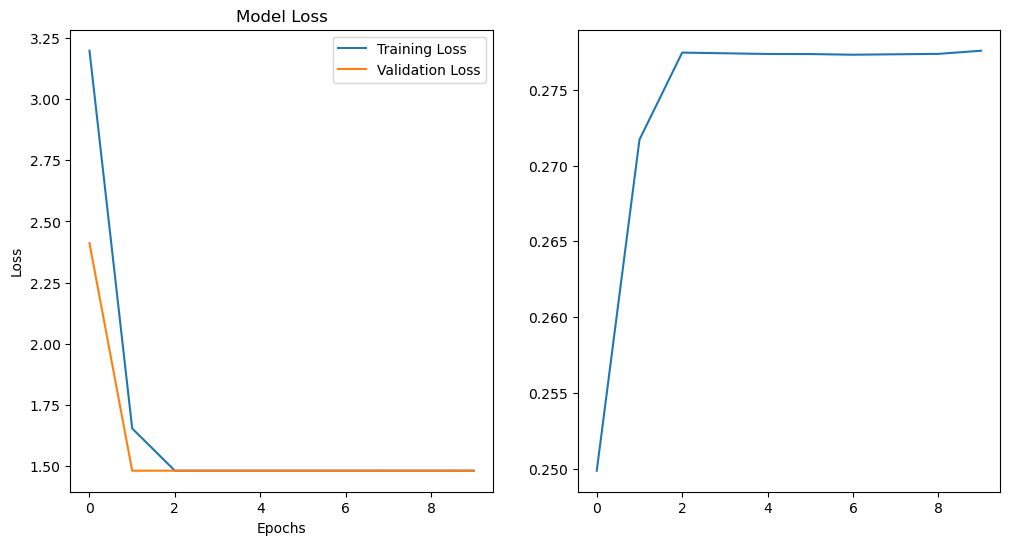

In [44]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Generate a classification report
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_report = classification_report(Y_test, Y_pred_classes)
print("Classification Report:\n", class_report)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming your data is loaded into a DataFrame named 'data_df'
# X features and Y label
X = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO'] # This is your target variable

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(data_df[X], data_df[Y], test_size=0.2, random_state=42)

# Convert categorical labels to one-hot encoded vectors
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, 5)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, 5)

# Feature Scaling/Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Input(shape=(len(X),)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

# Implement a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(
    X_train_scaled, Y_train, batch_size=128, epochs=50,
    validation_split=0.2, verbose=2, callbacks=[early_stopping]
)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/50
27447/27447 - 192s - loss: 1.4422 - accuracy: 0.3402 - val_loss: 1.4158 - val_accuracy: 0.3570 - 192s/epoch - 7ms/step
Epoch 2/50
27447/27447 - 178s - loss: 1.4263 - accuracy: 0.3513 - val_loss: 1.4153 - val_accuracy: 0.3570 - 178s/epoch - 6ms/step
Epoch 3/50
27447/27447 - 178s - loss: 1.4260 - accuracy: 0.3518 - val_loss: 1.4153 - val_accuracy: 0.3572 - 178s/epoch - 6ms/step
Epoch 4/50
27447/27447 - 178s - loss: 1.4259 - accuracy: 0.3518 - val_loss: 1.4152 - val_accuracy: 0.3571 - 178s/epoch - 6ms/step
Epoch 5/50
27447/27447 - 179s - loss: 1.4259 - accuracy: 0.3519 - val_loss: 1.4153 - val_accuracy: 0.3573 - 179s/epoch - 7ms/step
Epoch 6/50
27447/27447 - 177s - loss: 1.4260 - accuracy: 0.3517 - val_loss: 1.4152 - val_accuracy: 0.3571 - 177s/epoch - 6ms/step
Epoch 7/50
27447/27447 - 178s - loss: 1.4258 - accuracy: 0.3517 - val_loss: 1.4152 - val_accuracy: 0.3573 - 178s/epoch - 6ms/step
Epoch 8/50
27447/27447 - 177s - loss: 1.4259 - accuracy: 0.3519 - val_loss: 1.4153 - val_a

34309/34309 [==============================] - 77s 2ms/step - loss: 1.4151 - accuracy: 0.3577
Test Loss: 1.4151264429092407
Test Accuracy: 0.3576749861240387
34309/34309 [==============================] - 67s 2ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.36      0.36    251724
           1       0.35      0.60      0.44    303864
           2       0.34      0.32      0.33    294666
           3       0.52      0.11      0.18    208300
           4       0.00      0.00      0.00     39303

    accuracy                           0.36   1097857
   macro avg       0.32      0.28      0.26   1097857
weighted avg       0.37      0.36      0.33   1097857



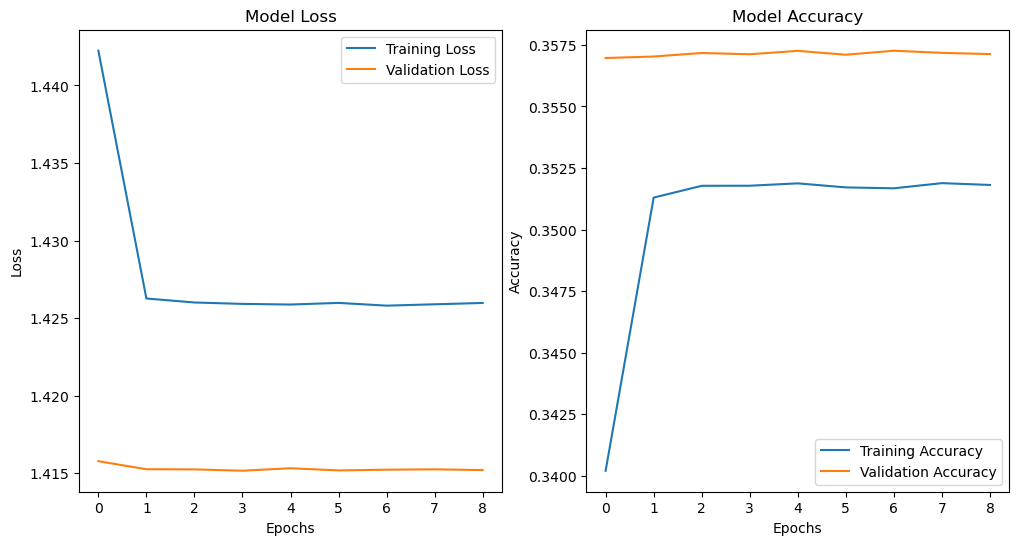

In [46]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Generate a classification report
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_report = classification_report(Y_test, Y_pred_classes)
print("Classification Report:\n", class_report)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [48]:
num_classes = 5

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming your data is loaded into a DataFrame named 'data_df'
# X features and Y label
X = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO']  # This is your target variable

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(data_df[X], data_df[Y], test_size=0.2, random_state=42)

# Convert categorical labels to one-hot encoded vectors
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes)

# Feature Scaling/Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection: Creating a Classification Model
model = keras.Sequential([
    layers.Input(shape=(len(X),)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train_scaled, Y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=2)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
27447/27447 - 55s - loss: 1.4227 - accuracy: 0.3524 - val_loss: 1.4106 - val_accuracy: 0.3609 - 55s/epoch - 2ms/step
Epoch 2/50
27447/27447 - 50s - loss: 1.4098 - accuracy: 0.3612 - val_loss: 1.4065 - val_accuracy: 0.3640 - 50s/epoch - 2ms/step
Epoch 3/50
27447/27447 - 51s - loss: 1.4061 - accuracy: 0.3639 - val_loss: 1.4040 - val_accuracy: 0.3663 - 51s/epoch - 2ms/step
Epoch 4/50
27447/27447 - 51s - loss: 1.4036 - accuracy: 0.3669 - val_loss: 1.4011 - val_accuracy: 0.3695 - 51s/epoch - 2ms/step
Epoch 5/50
27447/27447 - 51s - loss: 1.4023 - accuracy: 0.3682 - val_loss: 1.4015 - val_accuracy: 0.3688 - 51s/epoch - 2ms/step
Epoch 6/50
27447/27447 - 51s - loss: 1.4015 - accuracy: 0.3688 - val_loss: 1.4004 - val_accuracy: 0.3709 - 51s/epoch - 2ms/step
Epoch 7/50
27447/27447 - 51s - loss: 1.4008 - accuracy: 0.3691 - val_loss: 1.3999 - val_accuracy: 0.3701 - 51s/epoch - 2ms/step
Epoch 8/50
27447/27447 - 50s - loss: 1.4002 - accuracy: 0.3696 - val_loss: 1.3998 - val_accuracy: 0.3698

34309/34309 [==============================] - 51s 1ms/step - loss: 1.3917 - accuracy: 0.3756
Test Loss: 1.3917181491851807
Test Accuracy: 0.3756299912929535
34309/34309 [==============================] - 44s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.35      0.37    251724
           1       0.37      0.51      0.43    303864
           2       0.36      0.45      0.40    294666
           3       0.43      0.18      0.25    208300
           4       0.20      0.00      0.01     39303

    accuracy                           0.38   1097857
   macro avg       0.35      0.30      0.29   1097857
weighted avg       0.38      0.38      0.36   1097857



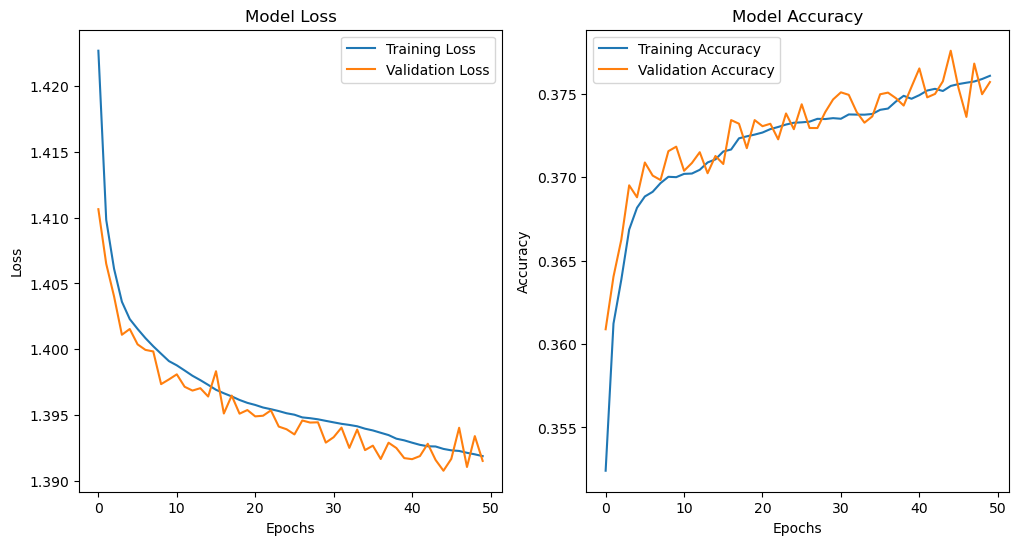

In [50]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Generate a classification report
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_report = classification_report(Y_test, Y_pred_classes)
print("Classification Report:\n", class_report)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming your data is loaded into a DataFrame named 'data_df'
# X features and Y label
X = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO']  # This is your target variable

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(data_df[X], data_df[Y], test_size=0.2, random_state=42)

# Convert categorical labels to one-hot encoded vectors
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes)

# Feature Scaling/Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection: Creating a Classification Model
model = keras.Sequential([
    layers.Input(shape=(len(X),)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train_scaled, Y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=2)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
27447/27447 - 54s - loss: 1.4242 - accuracy: 0.3519 - val_loss: 1.4111 - val_accuracy: 0.3607 - 54s/epoch - 2ms/step
Epoch 2/50
27447/27447 - 49s - loss: 1.4094 - accuracy: 0.3617 - val_loss: 1.4054 - val_accuracy: 0.3655 - 49s/epoch - 2ms/step
Epoch 3/50
27447/27447 - 51s - loss: 1.4061 - accuracy: 0.3641 - val_loss: 1.4048 - val_accuracy: 0.3643 - 51s/epoch - 2ms/step
Epoch 4/50
27447/27447 - 51s - loss: 1.4045 - accuracy: 0.3653 - val_loss: 1.4031 - val_accuracy: 0.3667 - 51s/epoch - 2ms/step
Epoch 5/50
27447/27447 - 56s - loss: 1.4030 - accuracy: 0.3671 - val_loss: 1.4006 - val_accuracy: 0.3673 - 56s/epoch - 2ms/step
Epoch 6/50
27447/27447 - 62s - loss: 1.4014 - accuracy: 0.3685 - val_loss: 1.4007 - val_accuracy: 0.3681 - 62s/epoch - 2ms/step
Epoch 7/50
27447/27447 - 54s - loss: 1.4006 - accuracy: 0.3689 - val_loss: 1.4001 - val_accuracy: 0.3693 - 54s/epoch - 2ms/step
Epoch 8/50
27447/27447 - 52s - loss: 1.3999 - accuracy: 0.3696 - val_loss: 1.3985 - val_accuracy: 0.3707

34309/34309 [==============================] - 49s 1ms/step - loss: 1.3943 - accuracy: 0.3747
Test Loss: 1.3943347930908203
Test Accuracy: 0.3747045397758484
34309/34309 [==============================] - 44s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.38      0.38    251724
           1       0.36      0.54      0.44    303864
           2       0.38      0.38      0.38    294666
           3       0.42      0.18      0.25    208300
           4       0.42      0.00      0.00     39303

    accuracy                           0.37   1097857
   macro avg       0.39      0.30      0.29   1097857
weighted avg       0.38      0.37      0.36   1097857



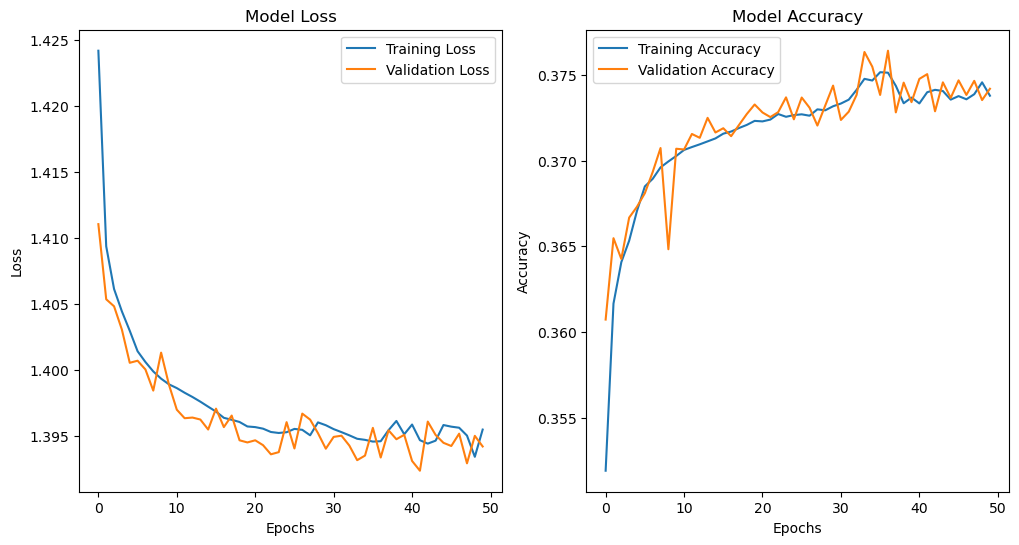

In [52]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Generate a classification report
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_report = classification_report(Y_test, Y_pred_classes)
print("Classification Report:\n", class_report)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Improvisation

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your data into a DataFrame named 'data_df'
# ...

# Define your feature columns and target column
X = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO'] 

# Extract features and target variable
X_data = data_df[X]
Y_data = data_df[Y]

# Convert categorical labels to numerical labels
Y_data_encoded = pd.Categorical(Y_data['ARREST_BORO']).codes

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_data, Y_data_encoded, test_size=0.2, random_state=42, shuffle=True
)

# Feature Scaling/Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of classes
num_classes = len(np.unique(Y_data_encoded))

# Model Selection: Creating a Classification Model
model = keras.Sequential([
    layers.Input(shape=(len(X),)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train_scaled, Y_train, batch_size=256, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
13724/13724 - 60s - loss: 1.4254 - accuracy: 0.3496 - val_loss: 1.4119 - val_accuracy: 0.3581 - 60s/epoch - 4ms/step
Epoch 2/100
13724/13724 - 53s - loss: 1.4131 - accuracy: 0.3584 - val_loss: 1.4087 - val_accuracy: 0.3605 - 53s/epoch - 4ms/step
Epoch 3/100
13724/13724 - 53s - loss: 1.4101 - accuracy: 0.3607 - val_loss: 1.4052 - val_accuracy: 0.3642 - 53s/epoch - 4ms/step
Epoch 4/100
13724/13724 - 57s - loss: 1.4075 - accuracy: 0.3629 - val_loss: 1.4020 - val_accuracy: 0.3671 - 57s/epoch - 4ms/step
Epoch 5/100
13724/13724 - 52s - loss: 1.4054 - accuracy: 0.3644 - val_loss: 1.3999 - val_accuracy: 0.3680 - 52s/epoch - 4ms/step
Epoch 6/100
13724/13724 - 54s - loss: 1.4036 - accuracy: 0.3657 - val_loss: 1.3980 - val_accuracy: 0.3699 - 54s/epoch - 4ms/step
Epoch 7/100
13724/13724 - 53s - loss: 1.4022 - accuracy: 0.3665 - val_loss: 1.3966 - val_accuracy: 0.3707 - 53s/epoch - 4ms/step
Epoch 8/100
13724/13724 - 54s - loss: 1.4013 - accuracy: 0.3673 - val_loss: 1.3958 - val_accuracy

13724/13724 - 53s - loss: 1.3919 - accuracy: 0.3762 - val_loss: 1.3880 - val_accuracy: 0.3777 - 53s/epoch - 4ms/step
Epoch 65/100
13724/13724 - 53s - loss: 1.3926 - accuracy: 0.3754 - val_loss: 1.3881 - val_accuracy: 0.3781 - 53s/epoch - 4ms/step
Epoch 66/100
13724/13724 - 53s - loss: 1.3922 - accuracy: 0.3756 - val_loss: 1.3873 - val_accuracy: 0.3785 - 53s/epoch - 4ms/step
Epoch 67/100
13724/13724 - 53s - loss: 1.3916 - accuracy: 0.3762 - val_loss: 1.3898 - val_accuracy: 0.3758 - 53s/epoch - 4ms/step
Epoch 68/100
13724/13724 - 53s - loss: 1.3913 - accuracy: 0.3766 - val_loss: 1.3890 - val_accuracy: 0.3742 - 53s/epoch - 4ms/step
Epoch 69/100
13724/13724 - 53s - loss: 1.3906 - accuracy: 0.3774 - val_loss: 1.3874 - val_accuracy: 0.3780 - 53s/epoch - 4ms/step
Epoch 70/100
13724/13724 - 53s - loss: 1.3905 - accuracy: 0.3773 - val_loss: 1.3901 - val_accuracy: 0.3754 - 53s/epoch - 4ms/step
Epoch 71/100
13724/13724 - 53s - loss: 1.3908 - accuracy: 0.3772 - val_loss: 1.3925 - val_accuracy: 0.3

34309/34309 [==============================] - 50s 1ms/step - loss: 1.4049 - accuracy: 0.3672
Test Loss: 1.4049394130706787
Test Accuracy: 0.3671707808971405
34309/34309 [==============================] - 46s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.41      0.39    251724
           1       0.36      0.53      0.43    303864
           2       0.36      0.36      0.36    294666
           3       0.41      0.17      0.24    208300
           4       0.26      0.00      0.01     39303

    accuracy                           0.37   1097857
   macro avg       0.35      0.29      0.28   1097857
weighted avg       0.37      0.37      0.35   1097857



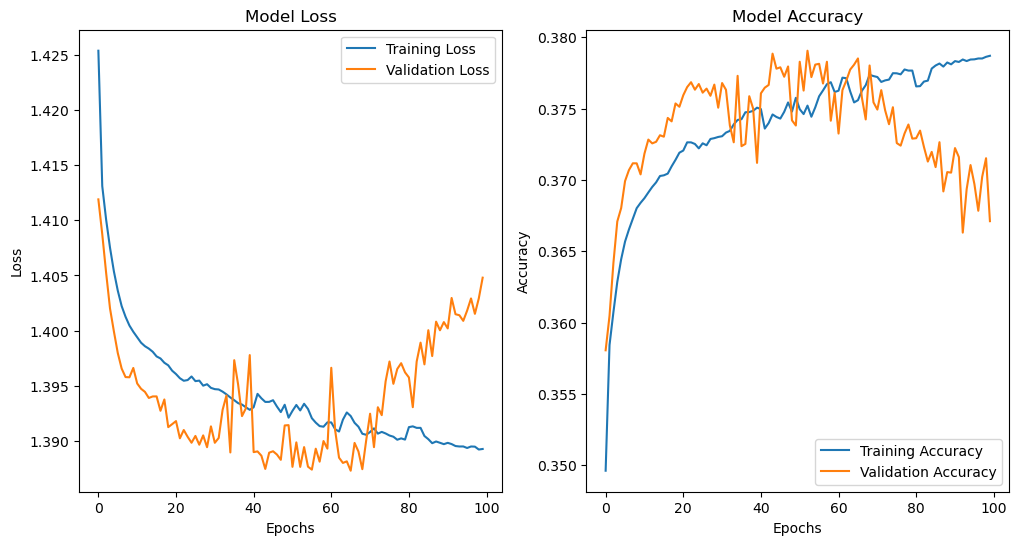

In [54]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Generate a classification report
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_report = classification_report(Y_test, Y_pred_classes)
print("Classification Report:\n", class_report)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# CNN

In [55]:
# Import necessary libraries
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape the data for CNN
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create a legacy Adam optimizer
legacy_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Create a CNN model
cnn_model = keras.Sequential([
    layers.Input(shape=(len(X), 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile and train the CNN model with the legacy optimizer
cnn_model.compile(optimizer=legacy_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_cnn, Y_train, batch_size=256, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, Y_test)
print("CNN Test Loss:", cnn_loss)
print("CNN Test Accuracy:", cnn_accuracy)

Epoch 1/100
13724/13724 - 80s - loss: 1.4243 - accuracy: 0.3507 - val_loss: 1.4100 - val_accuracy: 0.3610 - 80s/epoch - 6ms/step
Epoch 2/100
13724/13724 - 76s - loss: 1.4115 - accuracy: 0.3600 - val_loss: 1.4063 - val_accuracy: 0.3622 - 76s/epoch - 6ms/step
Epoch 3/100
13724/13724 - 76s - loss: 1.4082 - accuracy: 0.3627 - val_loss: 1.4023 - val_accuracy: 0.3669 - 76s/epoch - 6ms/step
Epoch 4/100
13724/13724 - 77s - loss: 1.4054 - accuracy: 0.3657 - val_loss: 1.4017 - val_accuracy: 0.3687 - 77s/epoch - 6ms/step
Epoch 5/100
13724/13724 - 76s - loss: 1.4036 - accuracy: 0.3673 - val_loss: 1.4021 - val_accuracy: 0.3683 - 76s/epoch - 6ms/step
Epoch 6/100
13724/13724 - 76s - loss: 1.4024 - accuracy: 0.3685 - val_loss: 1.3992 - val_accuracy: 0.3698 - 76s/epoch - 6ms/step
Epoch 7/100
13724/13724 - 77s - loss: 1.4013 - accuracy: 0.3693 - val_loss: 1.3959 - val_accuracy: 0.3733 - 77s/epoch - 6ms/step
Epoch 8/100
13724/13724 - 76s - loss: 1.4007 - accuracy: 0.3699 - val_loss: 1.3957 - val_accuracy

13724/13724 - 79s - loss: 1.3916 - accuracy: 0.3780 - val_loss: 1.3897 - val_accuracy: 0.3790 - 79s/epoch - 6ms/step
Epoch 65/100
13724/13724 - 76s - loss: 1.3916 - accuracy: 0.3779 - val_loss: 1.3881 - val_accuracy: 0.3799 - 76s/epoch - 6ms/step
Epoch 66/100
13724/13724 - 76s - loss: 1.3915 - accuracy: 0.3783 - val_loss: 1.3884 - val_accuracy: 0.3803 - 76s/epoch - 6ms/step
Epoch 67/100
13724/13724 - 76s - loss: 1.3915 - accuracy: 0.3781 - val_loss: 1.3876 - val_accuracy: 0.3802 - 76s/epoch - 6ms/step
Epoch 68/100
13724/13724 - 76s - loss: 1.3915 - accuracy: 0.3780 - val_loss: 1.3884 - val_accuracy: 0.3796 - 76s/epoch - 6ms/step
Epoch 69/100
13724/13724 - 75s - loss: 1.3954 - accuracy: 0.3745 - val_loss: 1.3907 - val_accuracy: 0.3788 - 75s/epoch - 5ms/step
Epoch 70/100
13724/13724 - 76s - loss: 1.3927 - accuracy: 0.3768 - val_loss: 1.3898 - val_accuracy: 0.3784 - 76s/epoch - 6ms/step
Epoch 71/100
13724/13724 - 76s - loss: 1.3922 - accuracy: 0.3776 - val_loss: 1.3900 - val_accuracy: 0.3

34309/34309 [==============================] - 55s 2ms/step - loss: 1.3899 - accuracy: 0.3780
CNN Test Loss: 1.3898988962173462
CNN Test Accuracy: 0.37796998023986816
34309/34309 [==============================] - 47s 1ms/step


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CNN Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.37      0.37    251724
           1       0.37      0.56      0.44    303864
           2       0.38      0.39      0.38    294666
           3       0.42      0.18      0.25    208300
           4       0.00      0.00      0.00     39303

    accuracy                           0.38   1097857
   macro avg       0.31      0.30      0.29   1097857
weighted avg       0.37      0.38      0.36   1097857



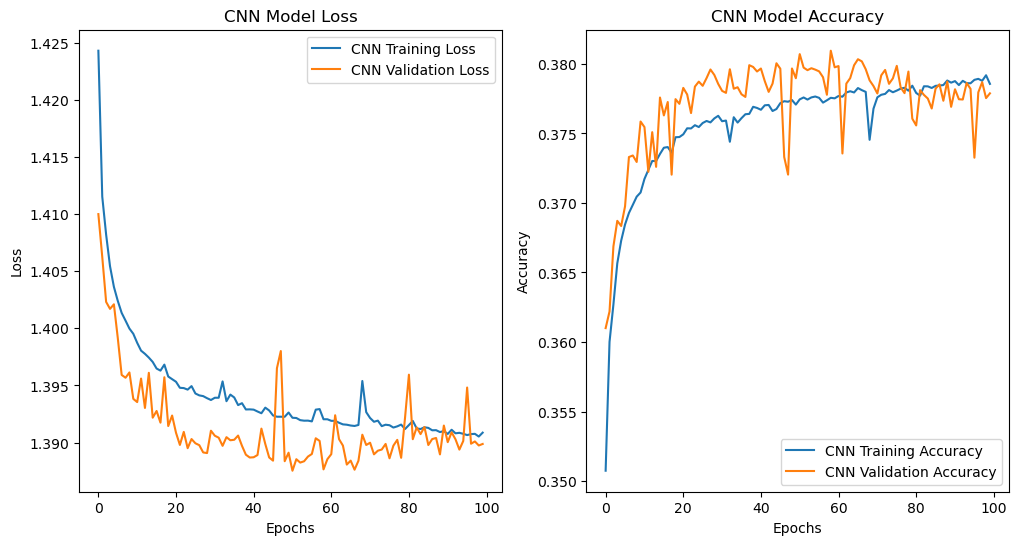

In [56]:
# Evaluate the CNN Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, Y_test)
print("CNN Test Loss:", cnn_loss)
print("CNN Test Accuracy:", cnn_accuracy)

# Generate a classification report for the CNN model
Y_cnn_pred = cnn_model.predict(X_test_cnn)
Y_cnn_pred_classes = np.argmax(Y_cnn_pred, axis=1)
cnn_class_report = classification_report(Y_test, Y_cnn_pred_classes)
print("CNN Classification Report:\n", cnn_class_report)

# Plot training & validation loss values for the CNN model
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values for the CNN model
plt.subplot(122)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# RNN

In [57]:
# Import necessary libraries
from tensorflow.keras.layers import SimpleRNN

# Reshape the data for RNN
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Create a legacy Adam optimizer
legacy_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Create an RNN model
rnn_model = keras.Sequential([
    layers.Input(shape=(1, len(X))),
    SimpleRNN(units=64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile and train the RNN model with the legacy optimizer
rnn_model.compile(optimizer=legacy_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_rnn, Y_train, batch_size=256, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, Y_test)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)


Epoch 1/100
13724/13724 - 78s - loss: 1.4221 - accuracy: 0.3516 - val_loss: 1.4086 - val_accuracy: 0.3600 - 78s/epoch - 6ms/step
Epoch 2/100
13724/13724 - 73s - loss: 1.4102 - accuracy: 0.3602 - val_loss: 1.4040 - val_accuracy: 0.3644 - 73s/epoch - 5ms/step
Epoch 3/100
13724/13724 - 73s - loss: 1.4057 - accuracy: 0.3642 - val_loss: 1.4005 - val_accuracy: 0.3695 - 73s/epoch - 5ms/step
Epoch 4/100
13724/13724 - 73s - loss: 1.4024 - accuracy: 0.3671 - val_loss: 1.3968 - val_accuracy: 0.3714 - 73s/epoch - 5ms/step
Epoch 5/100
13724/13724 - 73s - loss: 1.4005 - accuracy: 0.3685 - val_loss: 1.3961 - val_accuracy: 0.3711 - 73s/epoch - 5ms/step
Epoch 6/100
13724/13724 - 73s - loss: 1.3992 - accuracy: 0.3696 - val_loss: 1.3964 - val_accuracy: 0.3716 - 73s/epoch - 5ms/step
Epoch 7/100
13724/13724 - 73s - loss: 1.3980 - accuracy: 0.3707 - val_loss: 1.3928 - val_accuracy: 0.3749 - 73s/epoch - 5ms/step
Epoch 8/100
13724/13724 - 73s - loss: 1.3970 - accuracy: 0.3717 - val_loss: 1.3916 - val_accuracy

13724/13724 - 73s - loss: 1.3827 - accuracy: 0.3839 - val_loss: 1.3783 - val_accuracy: 0.3866 - 73s/epoch - 5ms/step
Epoch 65/100
13724/13724 - 73s - loss: 1.3828 - accuracy: 0.3838 - val_loss: 1.3781 - val_accuracy: 0.3868 - 73s/epoch - 5ms/step
Epoch 66/100
13724/13724 - 73s - loss: 1.3827 - accuracy: 0.3838 - val_loss: 1.3778 - val_accuracy: 0.3869 - 73s/epoch - 5ms/step
Epoch 67/100
13724/13724 - 73s - loss: 1.3827 - accuracy: 0.3840 - val_loss: 1.3779 - val_accuracy: 0.3871 - 73s/epoch - 5ms/step
Epoch 68/100
13724/13724 - 73s - loss: 1.3827 - accuracy: 0.3839 - val_loss: 1.3776 - val_accuracy: 0.3868 - 73s/epoch - 5ms/step
Epoch 69/100
13724/13724 - 74s - loss: 1.3826 - accuracy: 0.3839 - val_loss: 1.3783 - val_accuracy: 0.3867 - 74s/epoch - 5ms/step
Epoch 70/100
13724/13724 - 74s - loss: 1.3826 - accuracy: 0.3840 - val_loss: 1.3775 - val_accuracy: 0.3873 - 74s/epoch - 5ms/step
Epoch 71/100
13724/13724 - 74s - loss: 1.3824 - accuracy: 0.3842 - val_loss: 1.3776 - val_accuracy: 0.3

In [58]:
from sklearn.metrics import classification_report

34309/34309 [==============================] - 56s 2ms/step - loss: 1.3783 - accuracy: 0.3876
RNN Test Loss: 1.3783208131790161
RNN Test Accuracy: 0.3875960111618042
34309/34309 [==============================] - 52s 2ms/step
RNN Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.40      0.39    251724
           1       0.37      0.54      0.44    303864
           2       0.40      0.39      0.40    294666
           3       0.41      0.22      0.29    208300
           4       0.26      0.00      0.01     39303

    accuracy                           0.39   1097857
   macro avg       0.37      0.31      0.30   1097857
weighted avg       0.39      0.39      0.37   1097857



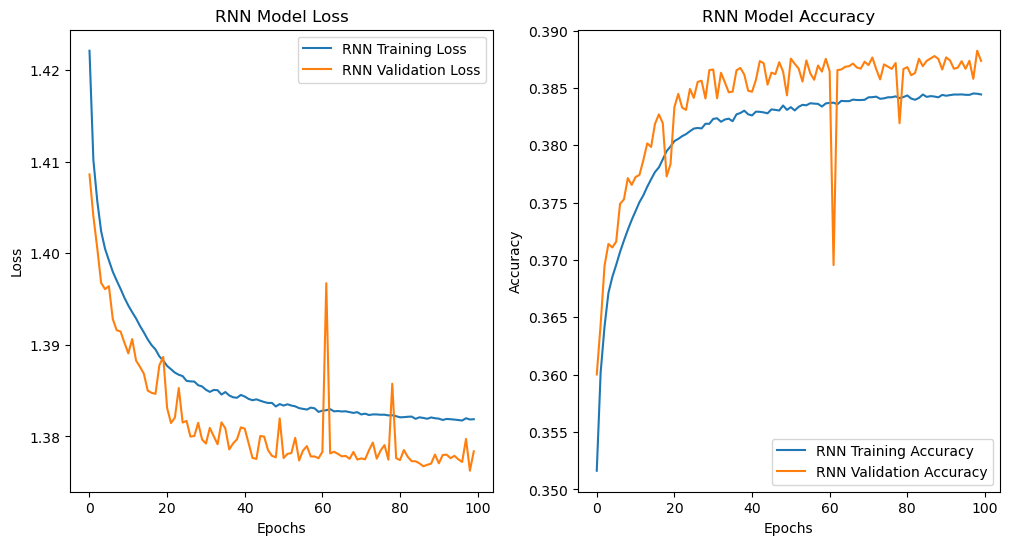

In [59]:
# Evaluate the RNN Model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, Y_test)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)

# Generate a classification report for the RNN model
Y_rnn_pred = rnn_model.predict(X_test_rnn)
Y_rnn_pred_classes = np.argmax(Y_rnn_pred, axis=1)
rnn_class_report = classification_report(Y_test, Y_rnn_pred_classes)
print("RNN Classification Report:\n", rnn_class_report)

# Plot training & validation loss values for the RNN model
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values for the RNN model
plt.subplot(122)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [102]:
# Predict class probabilities for test data
rnn_pred_probs = rnn_model.predict(X_test_rnn)

# Convert predicted probabilities to class labels
rnn_pred_labels = np.argmax(rnn_pred_probs, axis=1)

# Generate classification report
class_report = classification_report(Y_test, rnn_pred_labels)
print(class_report)

34309/34309 [==============================] - 48s 1ms/step
              precision    recall  f1-score   support

           0       0.39      0.35      0.37    251724
           1       0.37      0.53      0.43    303864
           2       0.37      0.43      0.40    294666
           3       0.43      0.19      0.27    208300
           4       0.29      0.00      0.00     39303

    accuracy                           0.38   1097857
   macro avg       0.37      0.30      0.29   1097857
weighted avg       0.38      0.38      0.36   1097857



# LSTM

In [60]:
# Import necessary libraries
from tensorflow.keras.layers import LSTM

# Import the legacy optimizer
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam

# Reshape the data for LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Create an LSTM model
lstm_model = keras.Sequential([
    layers.Input(shape=(1, len(X))),
    LSTM(units=64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Create a legacy optimizer
legacy_optimizer = LegacyAdam(learning_rate=0.001)

# Compile and train the LSTM model with the legacy optimizer
lstm_model.compile(optimizer=legacy_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_lstm, Y_train, batch_size=256, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, Y_test)
print("LSTM Test Loss:", lstm_loss)
print("LSTM Test Accuracy:", lstm_accuracy)

Epoch 1/100
13724/13724 - 93s - loss: 1.4244 - accuracy: 0.3500 - val_loss: 1.4140 - val_accuracy: 0.3548 - 93s/epoch - 7ms/step
Epoch 2/100
13724/13724 - 86s - loss: 1.4120 - accuracy: 0.3594 - val_loss: 1.4061 - val_accuracy: 0.3621 - 86s/epoch - 6ms/step
Epoch 3/100
13724/13724 - 87s - loss: 1.4074 - accuracy: 0.3632 - val_loss: 1.4027 - val_accuracy: 0.3674 - 87s/epoch - 6ms/step
Epoch 4/100
13724/13724 - 86s - loss: 1.4043 - accuracy: 0.3656 - val_loss: 1.4005 - val_accuracy: 0.3687 - 86s/epoch - 6ms/step
Epoch 5/100
13724/13724 - 86s - loss: 1.4023 - accuracy: 0.3670 - val_loss: 1.3979 - val_accuracy: 0.3698 - 86s/epoch - 6ms/step
Epoch 6/100
13724/13724 - 86s - loss: 1.4008 - accuracy: 0.3682 - val_loss: 1.3957 - val_accuracy: 0.3724 - 86s/epoch - 6ms/step
Epoch 7/100
13724/13724 - 87s - loss: 1.3998 - accuracy: 0.3690 - val_loss: 1.3959 - val_accuracy: 0.3718 - 87s/epoch - 6ms/step
Epoch 8/100
13724/13724 - 86s - loss: 1.3988 - accuracy: 0.3699 - val_loss: 1.3940 - val_accuracy

13724/13724 - 86s - loss: 1.3827 - accuracy: 0.3841 - val_loss: 1.3777 - val_accuracy: 0.3878 - 86s/epoch - 6ms/step
Epoch 65/100
13724/13724 - 86s - loss: 1.3825 - accuracy: 0.3843 - val_loss: 1.3862 - val_accuracy: 0.3824 - 86s/epoch - 6ms/step
Epoch 66/100
13724/13724 - 87s - loss: 1.3827 - accuracy: 0.3841 - val_loss: 1.3772 - val_accuracy: 0.3879 - 87s/epoch - 6ms/step
Epoch 67/100
13724/13724 - 86s - loss: 1.3824 - accuracy: 0.3845 - val_loss: 1.3763 - val_accuracy: 0.3884 - 86s/epoch - 6ms/step
Epoch 68/100
13724/13724 - 86s - loss: 1.3824 - accuracy: 0.3847 - val_loss: 1.3771 - val_accuracy: 0.3877 - 86s/epoch - 6ms/step
Epoch 69/100
13724/13724 - 86s - loss: 1.3821 - accuracy: 0.3846 - val_loss: 1.3770 - val_accuracy: 0.3882 - 86s/epoch - 6ms/step
Epoch 70/100
13724/13724 - 86s - loss: 1.3822 - accuracy: 0.3845 - val_loss: 1.3772 - val_accuracy: 0.3879 - 86s/epoch - 6ms/step
Epoch 71/100
13724/13724 - 87s - loss: 1.3821 - accuracy: 0.3845 - val_loss: 1.3767 - val_accuracy: 0.3

34309/34309 [==============================] - 56s 2ms/step - loss: 1.3783 - accuracy: 0.3876
RNN Test Loss: 1.3783208131790161
RNN Test Accuracy: 0.3875960111618042
34309/34309 [==============================] - 51s 1ms/step
RNN Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.40      0.39    251724
           1       0.37      0.54      0.44    303864
           2       0.40      0.39      0.40    294666
           3       0.41      0.22      0.29    208300
           4       0.26      0.00      0.01     39303

    accuracy                           0.39   1097857
   macro avg       0.37      0.31      0.30   1097857
weighted avg       0.39      0.39      0.37   1097857



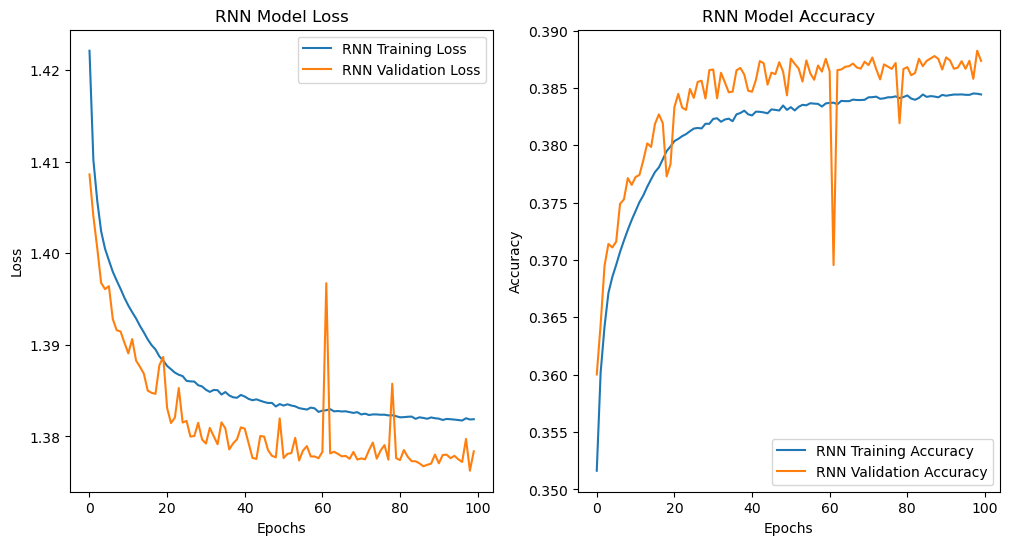

In [61]:
# Evaluate the RNN Model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, Y_test)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)

# Generate a classification report for the RNN model
Y_rnn_pred = rnn_model.predict(X_test_rnn)
Y_rnn_pred_classes = np.argmax(Y_rnn_pred, axis=1)
rnn_class_report = classification_report(Y_test, Y_rnn_pred_classes)
print("RNN Classification Report:\n", rnn_class_report)

# Plot training & validation loss values for the RNN model
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values for the RNN model
plt.subplot(122)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## RNN Again

In [ ]:
data_df['OFNS_DESC'].value_counts()

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define your feature columns and target column
X = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO']

# Extract features and target variable
X_data = data_df[X]
Y_data = data_df[Y]

# Assuming you have already imported and processed your data, and have X_train_scaled, X_test_scaled, Y_train, and Y_test ready.

# Reshape the data for RNN
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Create a legacy Adam optimizer
legacy_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

# Create an RNN model
rnn_model = keras.Sequential([
    layers.Input(shape=(1, len(X))),
    SimpleRNN(units=64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile and train the RNN model with the legacy optimizer
rnn_model.compile(optimizer=legacy_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_rnn, Y_train, batch_size=256, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, Y_test)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)


In [ ]:
# Train the RNN model on your training data
history = rnn_model.fit(X_train_rnn, Y_train, batch_size=256, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the RNN Model
loss, accuracy = rnn_model.evaluate(X_test_rnn, Y_test)
print("RNN Test Loss:", loss)
print("RNN Test Accuracy:", accuracy)

# Generate a classification report for the RNN model
Y_rnn_pred = rnn_model.predict(X_test_rnn)
Y_rnn_pred_classes = np.argmax(Y_rnn_pred, axis=1)
rnn_class_report = classification_report(Y_test, Y_rnn_pred_classes)
print("RNN Classification Report:\n", rnn_class_report)

# Plot training & validation loss values for the RNN model
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], label='RNN Training Loss')
plt.plot(history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values for the RNN model
plt.subplot(122)
plt.plot(history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#### SMOTE

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE

# Define your feature columns and target column
X = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','ARREST_DAY','ARREST_MONTH','ARREST_YEAR']
Y = ['ARREST_BORO']

# Extract features and target variable
X_data = data_df[X]
Y_data = data_df[Y]

# Assuming you have already imported and processed your data, and have X_train_scaled, X_test_scaled, Y_train, and Y_test ready.

# Perform SMOTE to balance the dataset with a smaller number of neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # You can adjust k_neighbors as needed
X_data_resampled, Y_data_resampled = smote.fit_resample(X_data, Y_data)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data_resampled, Y_data_resampled, test_size=0.2, random_state=42)

# Reshape the data for RNN
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Create a legacy Adam optimizer
legacy_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

# Create an RNN model
rnn_model = keras.Sequential([
    layers.Input(shape=(1, len(X))),
    SimpleRNN(units=64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile and train the RNN model with the legacy optimizer
rnn_model.compile(optimizer=legacy_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_rnn, Y_train, batch_size=256, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, Y_test)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)

In [ ]:
# Train the RNN model on your training data
rnn_history = rnn_model.fit(X_train_rnn, Y_train, batch_size=256, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the RNN Model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, Y_test)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)

# Generate a classification report for the RNN model
Y_rnn_pred = rnn_model.predict(X_test_rnn)
Y_rnn_pred_classes = np.argmax(Y_rnn_pred, axis=1)
rnn_class_report = classification_report(Y_test, Y_rnn_pred_classes)
print("RNN Classification Report:\n", rnn_class_report)

# Plot training & validation loss values for the RNN model
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values for the RNN model
plt.subplot(122)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Convert target labels to one-hot encoded format
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes)

# Create an RNN model with LSTM layers
rnn_model = keras.Sequential([
    layers.Input(shape=(X_train_encoded.shape[1], X_train_encoded.shape[2])),
    layers.LSTM(units=128, activation='relu', return_sequences=True),
    layers.LSTM(units=64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Use the Adam optimizer with a reasonable learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model with categorical crossentropy loss for multi-class classification
rnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train_encoded, Y_train_encoded, batch_size=256, epochs=50, validation_split=0.2, verbose=2)

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_encoded, Y_test)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)

# Generate classification report
rnn_pred_probs = rnn_model.predict(X_test_encoded)
rnn_pred_labels = np.argmax(rnn_pred_probs, axis=1)
class_report = classification_report(Y_test, rnn_pred_labels)
print(class_report)

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation accuracy and loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y_data, test_size=0.2, random_state=42)

# Convert target labels to one-hot encoded format
num_classes = len(np.unique(Y_train))
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes)

# Create an RNN model with LSTM layers
rnn_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Use the Adam optimizer with a reasonable learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with categorical crossentropy loss for multi-class classification
rnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train_scaled, Y_train_encoded, batch_size=128, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_scaled, Y_test_encoded)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)

# Generate classification report
rnn_pred_probs = rnn_model.predict(X_test_scaled)
rnn_pred_labels = np.argmax(rnn_pred_probs, axis=1)
class_report = classification_report(Y_test, rnn_pred_labels)
print(class_report)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y_data, test_size=0.2, random_state=42)

# Convert target labels to one-hot encoded format
num_classes = len(np.unique(Y_train))
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes)

# Create an MLP model
mlp_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Use the Adam optimizer with a reasonable learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with categorical crossentropy loss for multi-class classification
mlp_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train_scaled, Y_train_encoded, batch_size=128, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the model
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test_scaled, Y_test_encoded)
print("MLP Test Loss:", mlp_loss)
print("MLP Test Accuracy:", mlp_accuracy)

# Generate classification report
mlp_pred_probs = mlp_model.predict(X_test_scaled)
mlp_pred_labels = np.argmax(mlp_pred_probs, axis=1)
class_report = classification_report(Y_test, mlp_pred_labels)
print(class_report)

Epoch 1/100
27447/27447 - 97s - loss: 1.4261 - accuracy: 0.3493 - val_loss: 1.4106 - val_accuracy: 0.3592 - 97s/epoch - 4ms/step
Epoch 2/100
27447/27447 - 72s - loss: 1.4140 - accuracy: 0.3583 - val_loss: 1.4068 - val_accuracy: 0.3626 - 72s/epoch - 3ms/step
Epoch 3/100
27447/27447 - 85s - loss: 1.4107 - accuracy: 0.3606 - val_loss: 1.4043 - val_accuracy: 0.3641 - 85s/epoch - 3ms/step
Epoch 4/100
27447/27447 - 87s - loss: 1.4082 - accuracy: 0.3625 - val_loss: 1.4022 - val_accuracy: 0.3655 - 87s/epoch - 3ms/step
Epoch 5/100
27447/27447 - 86s - loss: 1.4068 - accuracy: 0.3635 - val_loss: 1.4013 - val_accuracy: 0.3660 - 86s/epoch - 3ms/step
Epoch 6/100
27447/27447 - 86s - loss: 1.4061 - accuracy: 0.3637 - val_loss: 1.4002 - val_accuracy: 0.3670 - 86s/epoch - 3ms/step
Epoch 7/100
27447/27447 - 87s - loss: 1.4054 - accuracy: 0.3645 - val_loss: 1.3999 - val_accuracy: 0.3666 - 87s/epoch - 3ms/step
Epoch 8/100
27447/27447 - 89s - loss: 1.4048 - accuracy: 0.3645 - val_loss: 1.3987 - val_accuracy